In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [98]:
prog = pd.read_csv('ProgressiveRakeback.csv')
flat = pd.read_csv('FlatRakeback.csv')

In [105]:
prog.head()

,Player,Hands,Result,RakePaid,1kRakeback,5kRakeback,>5kRakeback,Cumulative,winrate,Rbwinrate,rbeffect,Reg,PlayerType,RBReg,RB_PlayerType
0,Player 1,298644,2285.47,17668.05,100.0,1000.0,5067.220,6167.22,0.765282,2.830357,2.698447,1,1,1,1
1,Player 2,232879,4353.83,14217.46,100.0,1000.0,3686.984,4786.98,1.869567,3.925133,1.099487,1,1,1,1
2,Player 3,207342,1398.22,15216.04,100.0,1000.0,4086.416,5186.42,0.674354,3.175739,3.709302,1,1,1,1
3,Player 4,183272,5522.98,10412.41,100.0,1000.0,2164.964,3264.96,3.013543,4.795026,0.591159,1,1,1,1
4,Player 5,164829,5251.84,10028.26,100.0,1000.0,2011.304,3111.30,3.186235,5.073828,0.592421,1,1,1,1


In [106]:
prog['PlayerType'].replace([1,0], ['Reg', 'Non-Reg'], inplace=True)
prog['RB_PlayerType'].replace([1,0], ['Reg', 'Non-Reg'], inplace=True)

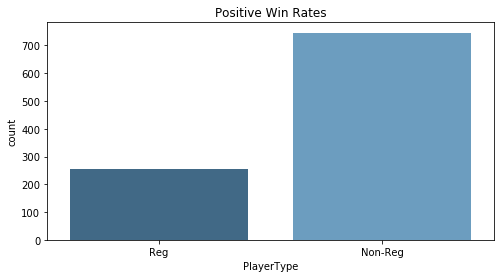

In [83]:
f,ax=plt.subplots(figsize=(8,4))
sns.countplot('PlayerType', data=prog, palette="Blues_d")
ax.set_title('Positive Win Rates')
#sns.countplot('RB_PlayerType', data=prog, ax=ax[1])
#ax[1].set_title('After Progressive Rakeback')
plt.show()

In [51]:
prog['PlayerType'].value_counts().to_frame()

,PlayerType
Non-Reg,746
Reg,254


In [55]:
prog['RB_PlayerType'].value_counts().to_frame()

,RB_PlayerType
Non-Reg,731
Reg,269


In [124]:
flat['RB_PlayerType'].value_counts().to_frame()

,RB_PlayerType
Reg,1000


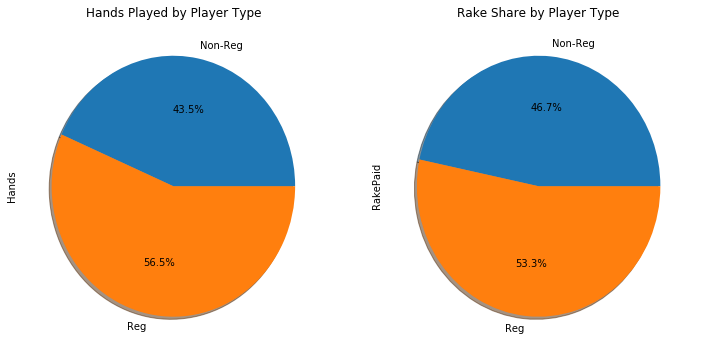

In [60]:
f,ax=plt.subplots(1,2,figsize=(12,6))
prog['Hands'].groupby(prog['PlayerType']).sum().plot.pie(ax=ax[0],autopct='%1.1f%%', shadow=True)
ax[0].set_title('Hands Played by Player Type')
prog['RakePaid'].groupby(prog['PlayerType']).sum().plot.pie(ax=ax[1],autopct='%1.1f%%', shadow=True)
ax[1].set_title('Rake Share by Player Type')
plt.show()

In [33]:
flat.head()

,Player,Hands,Result,RakePaid,FlatRB,winrate,Rbwinrate,Rbeffect,Reg,RBReg,Avgwinrate,RBAvgwinrate
0,Player 1,298644,2285.47,17668.05,3533.610,0.765282,1.948501,1.546120,1,1,1,1
1,Player 2,232879,4353.83,14217.46,2843.492,1.869567,3.090584,0.653101,1,1,1,1
2,Player 3,207342,1398.22,15216.04,3043.208,0.674354,2.142078,2.176487,1,1,1,1
3,Player 4,183272,5522.98,10412.41,2082.482,3.013543,4.149822,0.377058,1,1,1,1
4,Player 5,164829,5251.84,10028.26,2005.652,3.186235,4.403043,0.381895,1,1,1,1


In [30]:
#winning players paid 3x in rake and 4x hands relative to losing players
print('Hands/Year: ', data.Hands.mean())
print('Rake Earned: ', data.RakePaid.sum())
print('Rakeback: ', data.Cumulative.sum())
print('Rakeback %: ', data.Cumulative.sum()/data.RakePaid.sum())
print('Rake Paid for Winning Players: ', data[data['bb/100']>0].RakePaid.mean())
print('Rake Paid for Losing Players: ', data[data['bb/100']<0].RakePaid.mean())
print('Hands for Winning Players: ', data[data['bb/100']>0].Hands.mean())
print('Hands for Losing Players: ', data[data['bb/100']<0].Hands.mean())

Hands/Year:  5129.792
Rake Earned:  358833.51999999984
Rakeback:  73173.27999999998
Rakeback %:  0.20391985676254554
Rake Paid for Winning Players:  752.7667716535437
Rake Paid for Losing Players:  224.70611260053602
Hands for Winning Players:  11407.417322834646
Hands for Losing Players:  2992.3699731903484


In [9]:
data.describe()
#massive variability in hands/player could be cause for flatter rakeback system to raise floor->rake smaller % at big stakes
#high variability in rake paid as well, with mean well below 1k

,Hands,Result,Rake Paid,1k Rakeback,5k Rakeback,>5k Rakeback,Cumulative,bb/100,(bb+rb)/100,rb effect
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5129.792000,-196.551800,358.833520,17.601854,29.258527,26.312348,73.173280,-24.203464,-23.151552,0.173481
std,20551.016205,795.223957,1303.798594,25.251086,147.950751,275.089295,398.125996,43.471369,43.422178,0.714520
min,295.000000,-5888.730000,7.830000,0.783000,0.000000,0.000000,0.780000,-277.457143,-275.302381,0.002516
25%,430.000000,-404.495000,42.435000,4.243500,0.000000,0.000000,4.240000,-45.122178,-44.301938,0.019334
50%,712.000000,-158.085000,75.805000,7.580500,0.000000,0.000000,7.585000,-18.198349,-17.091965,0.035055
75%,1687.250000,4.557500,165.450000,16.545000,0.000000,0.000000,16.545000,0.343069,1.228374,0.090422
max,298644.000000,7424.760000,17668.050000,100.000000,1000.000000,5067.220000,6167.220000,118.393684,120.821053,15.858414


In [123]:
flat.describe()

,Hands,Result,RakePaid,FlatRB,winrate,Rbwinrate,Rbeffect,Reg,RBReg
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5129.792000,-196.551800,358.833520,71.766704,-24.203464,-22.179510,0.283279,0.254000,0.286000
std,20551.016205,795.223957,1303.798594,260.759719,43.471369,43.333087,1.042956,0.435515,0.452115
min,295.000000,-5888.730000,7.830000,1.566000,-277.457143,-273.149048,0.005018,0.000000,0.000000
25%,430.000000,-404.495000,42.435000,8.487000,-45.122178,-43.227486,0.038517,0.000000,0.000000
50%,712.000000,-158.085000,75.805000,15.161000,-18.198349,-16.176859,0.070168,0.000000,0.000000
75%,1687.250000,4.557500,165.450000,33.090000,0.343069,1.873058,0.177984,1.000000,1.000000
max,298644.000000,7424.760000,17668.050000,3533.610000,118.393684,123.248842,20.833333,1.000000,1.000000


In [25]:
#is there a correlation btw rake paid and results- meaning better players are paying higher % of rake-flatter rakeback
data['bb/100_range'] = pd.qcut(data['bb/100'], 8)
data.groupby(['bb/100_range'])['RakePaid'].mean().to_frame()

,RakePaid
bb/100_range,
"(-277.458, -70.799]",91.75640
"(-70.799, -45.122]",80.92224
"(-45.122, -29.5]",103.39976
"(-29.5, -18.198]",147.33752
"(-18.198, -8.549]",195.83352
"(-8.549, 0.343]",761.59328
"(0.343, 14.779]",1386.03624
"(14.779, 118.394]",103.78920


In [66]:
prog['Tier'] = pd.qcut(prog['Hands'], 7)
prog.groupby(['Tier'])['RakePaid'].mean().to_frame()

,RakePaid
Tier,
"(294.999, 360.714]",36.225664
"(360.714, 457.429]",46.790070
"(457.429, 600.143]",57.665105
"(600.143, 863.857]",77.479366
"(863.857, 1420.429]",116.992797
"(1420.429, 3640.143]",191.812238
"(3640.143, 298644.0]",1982.901888


In [107]:
prog['Tier'] = 0
prog.loc[(prog['Hands']>294)&(prog['Hands']<=360.714),'Tier']=0
prog.loc[(prog['Hands']>360.714)&(prog['Hands']<=457.429),'Tier']=1
prog.loc[(prog['Hands']>457.429)&(prog['Hands']<=600.143),'Tier']=2
prog.loc[(prog['Hands']>600.143)&(prog['Hands']<=863.857),'Tier']=3
prog.loc[(prog['Hands']>863.857)&(prog['Hands']<=1420.429),'Tier']=4
prog.loc[(prog['Hands']>1420.429)&(prog['Hands']<=3640.143),'Tier']=5
prog.loc[(prog['Hands']>3640.143)&(prog['Hands']<=298644),'Tier']=6

In [108]:
prog['Tier'].replace([0,1,2,3,4,5,6], ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Supernova', 'Supernova Elite'], inplace=True)

In [109]:
prog.head()

,Player,Hands,Result,RakePaid,1kRakeback,5kRakeback,>5kRakeback,Cumulative,winrate,Rbwinrate,rbeffect,Reg,PlayerType,RBReg,RB_PlayerType,Tier
0,Player 1,298644,2285.47,17668.05,100.0,1000.0,5067.220,6167.22,0.765282,2.830357,2.698447,1,Reg,1,Reg,Supernova Elite
1,Player 2,232879,4353.83,14217.46,100.0,1000.0,3686.984,4786.98,1.869567,3.925133,1.099487,1,Reg,1,Reg,Supernova Elite
2,Player 3,207342,1398.22,15216.04,100.0,1000.0,4086.416,5186.42,0.674354,3.175739,3.709302,1,Reg,1,Reg,Supernova Elite
3,Player 4,183272,5522.98,10412.41,100.0,1000.0,2164.964,3264.96,3.013543,4.795026,0.591159,1,Reg,1,Reg,Supernova Elite
4,Player 5,164829,5251.84,10028.26,100.0,1000.0,2011.304,3111.30,3.186235,5.073828,0.592421,1,Reg,1,Reg,Supernova Elite


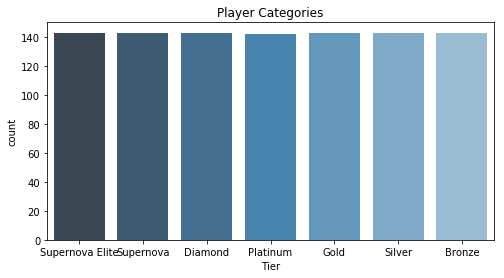

In [122]:
f,ax=plt.subplots(figsize=(8,4))
sns.countplot('Tier', data=prog, palette="Blues_d")
ax.set_title('Player Categories')
#sns.countplot('RB_PlayerType', data=prog, ax=ax[1])
#ax[1].set_title('After Progressive Rakeback')
plt.show()

In [110]:
tiers = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Supernova', 'Supernova Elite']
wr = []
wr.append(prog[prog['Tier']=='Bronze'].winrate.mean())
wr.append(prog[prog['Tier']=='Silver'].winrate.mean())
wr.append(prog[prog['Tier']=='Gold'].winrate.mean())
wr.append(prog[prog['Tier']=='Platinum'].winrate.mean())
wr.append(prog[prog['Tier']=='Diamond'].winrate.mean())
wr.append(prog[prog['Tier']=='Supernova'].winrate.mean())
wr.append(prog[prog['Tier']=='Supernova Elite'].winrate.mean())
print(wr)

[-34.61552471596502, -31.002186885237762, -30.674962617636364, -26.700942368866198, -22.87743297233566, -18.789806657762234, -4.780859611342656]


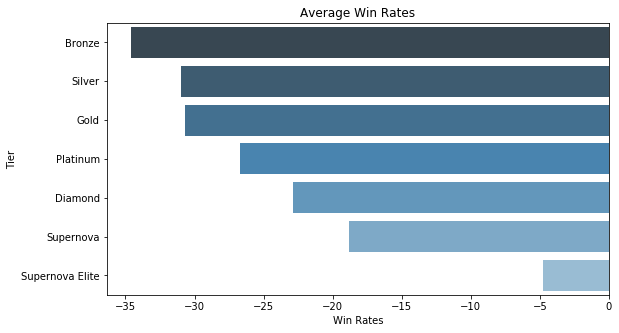

In [112]:
tier_wr = pd.DataFrame({'Tier': tiers, 'Win Rates': wr})
f,ax=plt.subplots(figsize=(9,5))
sns.barplot('Win Rates', 'Tier', data=tier_wr, palette="Blues_d")
ax.set_title('Average Win Rates')
plt.show()

In [120]:
hands=[]
hands.append(prog[prog['Tier']=='Bronze'].Hands.mean())
hands.append(prog[prog['Tier']=='Silver'].Hands.mean())
hands.append(prog[prog['Tier']=='Gold'].Hands.mean())
hands.append(prog[prog['Tier']=='Platinum'].Hands.mean())
hands.append(prog[prog['Tier']=='Diamond'].Hands.mean())
hands.append(prog[prog['Tier']=='Supernova'].Hands.mean())
hands.append(prog[prog['Tier']=='Supernova Elite'].Hands.mean())
print(hands)

[325.3636363636364, 405.958041958042, 523.3566433566433, 718.1478873239437, 1097.7132867132866, 2228.1188811188813, 30579.034965034964]


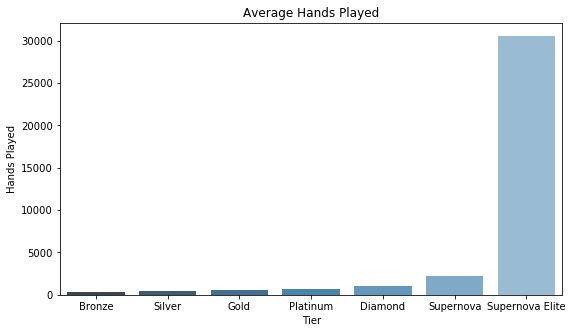

In [121]:
tier_hands = pd.DataFrame({'Tier': tiers, 'Hands Played': hands})
f,ax=plt.subplots(figsize=(9,5))
sns.barplot('Tier', 'Hands Played', data=tier_hands, palette="Blues_d")
ax.set_title('Average Hands Played')
plt.show()

In [111]:
win = []
win.append(prog[prog['Tier']=='Bronze'].Reg.sum())
win.append(prog[prog['Tier']=='Silver'].Reg.sum())
win.append(prog[prog['Tier']=='Gold'].Reg.sum())
win.append(prog[prog['Tier']=='Platinum'].Reg.sum())
win.append(prog[prog['Tier']=='Diamond'].Reg.sum())
win.append(prog[prog['Tier']=='Supernova'].Reg.sum())
win.append(prog[prog['Tier']=='Supernova Elite'].Reg.sum())
print(win)

[33, 36, 34, 30, 37, 27, 57]


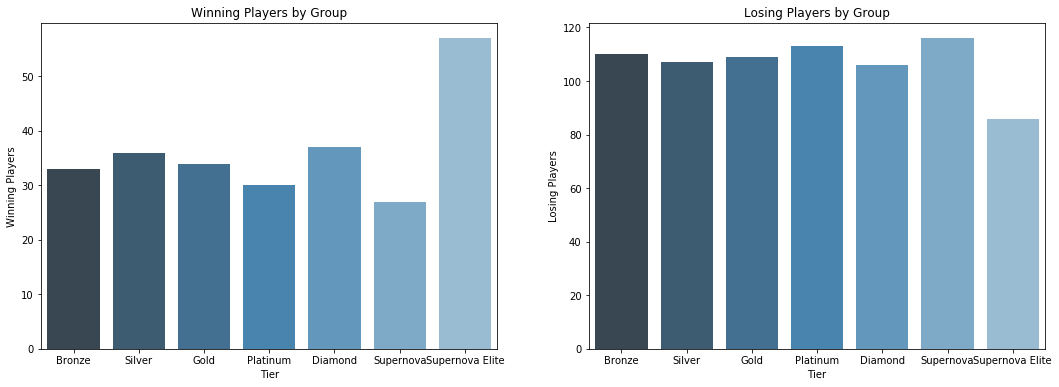

In [118]:
lose=[110,107,109,113,106,116,86]
tier_win = pd.DataFrame({'Tier': tiers, 'Winning Players': win})
tier_lose = pd.DataFrame({'Tier': tiers, 'Losing Players': lose})
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.barplot('Tier', 'Winning Players', data=tier_win, ax=ax[0], palette="Blues_d")
ax[0].set_title('Winning Players by Group')
sns.barplot('Tier', 'Losing Players', data=tier_lose, ax=ax[1], palette="Blues_d")
ax[1].set_title('Losing Players by Group')
plt.show()

In [86]:
rb_wr=[]
rb_wr.append(prog[prog['Tier']=='Bronze'].Rbwinrate.mean())
rb_wr.append(prog[prog['Tier']=='Silver'].Rbwinrate.mean())
rb_wr.append(prog[prog['Tier']=='Gold'].Rbwinrate.mean())
rb_wr.append(prog[prog['Tier']=='Platinum'].Rbwinrate.mean())
rb_wr.append(prog[prog['Tier']=='Diamond'].Rbwinrate.mean())
rb_wr.append(prog[prog['Tier']=='Supernova'].Rbwinrate.mean())
rb_wr.append(prog[prog['Tier']=='Supernova Elite'].Rbwinrate.mean())
print(rb_wr)

[-33.49793645663637, -29.848435851321693, -29.5781617909021, -25.624847867612687, -21.812137828055942, -17.915722377216778, -3.8009142374895095]


In [87]:
prog_rb_effect = []
prog_rb_effect.append(prog[prog['Tier']=='Bronze'].rbeffect.mean())
prog_rb_effect.append(prog[prog['Tier']=='Silver'].rbeffect.mean())
prog_rb_effect.append(prog[prog['Tier']=='Gold'].rbeffect.mean())
prog_rb_effect.append(prog[prog['Tier']=='Platinum'].rbeffect.mean())
prog_rb_effect.append(prog[prog['Tier']=='Diamond'].rbeffect.mean())
prog_rb_effect.append(prog[prog['Tier']=='Supernova'].rbeffect.mean())
prog_rb_effect.append(prog[prog['Tier']=='Supernova Elite'].rbeffect.mean())
print(prog_rb_effect)

[0.13476797956643355, 0.06144573837762239, 0.0597909518601399, 0.16317868954929576, 0.11535884686013986, 0.13001090333566437, 0.5497397385454543]


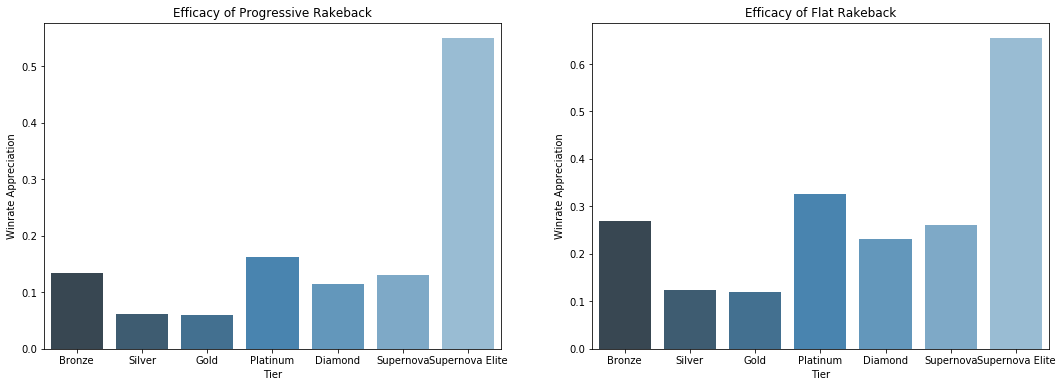

In [119]:
tier_rb = pd.DataFrame({'Tier': tiers, 'Winrate Appreciation': prog_rb_effect})
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.barplot('Tier', 'Winrate Appreciation', data=tier_rb, ax=ax[0], palette="Blues_d")
ax[0].set_title('Efficacy of Progressive Rakeback')
sns.barplot('Tier', 'Winrate Appreciation', data=flat_rb, ax=ax[1], palette="Blues_d")
ax[1].set_title('Efficacy of Flat Rakeback')
plt.show()

In [89]:
flat.head()

,Player,Hands,Result,RakePaid,FlatRB,winrate,Rbwinrate,Rbeffect,Reg,PlayerType,RBReg,RB_PlayerType
0,Player 1,298644,2285.47,17668.05,3533.610,0.765282,1.948501,1.546120,1,1,1,1
1,Player 2,232879,4353.83,14217.46,2843.492,1.869567,3.090584,0.653101,1,1,1,1
2,Player 3,207342,1398.22,15216.04,3043.208,0.674354,2.142078,2.176487,1,1,1,1
3,Player 4,183272,5522.98,10412.41,2082.482,3.013543,4.149822,0.377058,1,1,1,1
4,Player 5,164829,5251.84,10028.26,2005.652,3.186235,4.403043,0.381895,1,1,1,1


In [99]:
flat['PlayerType'].replace([1,0], ['Reg', 'Non-Reg'], inplace=True)
flat['RB_PlayerType'].replace([1,0], ['Reg', 'Non-Reg'], inplace=True)
flat.head()

,Player,Hands,Result,RakePaid,FlatRB,winrate,Rbwinrate,Rbeffect,Reg,PlayerType,RBReg,RB_PlayerType
0,Player 1,298644,2285.47,17668.05,3533.610,0.765282,1.948501,1.546120,1,Reg,1,Reg
1,Player 2,232879,4353.83,14217.46,2843.492,1.869567,3.090584,0.653101,1,Reg,1,Reg
2,Player 3,207342,1398.22,15216.04,3043.208,0.674354,2.142078,2.176487,1,Reg,1,Reg
3,Player 4,183272,5522.98,10412.41,2082.482,3.013543,4.149822,0.377058,1,Reg,1,Reg
4,Player 5,164829,5251.84,10028.26,2005.652,3.186235,4.403043,0.381895,1,Reg,1,Reg


In [100]:
flat['Tier'] = 0
flat.loc[(flat['Hands']>294)&(flat['Hands']<=360.714),'Tier']=0
flat.loc[(flat['Hands']>360.714)&(flat['Hands']<=457.429),'Tier']=1
flat.loc[(flat['Hands']>457.429)&(flat['Hands']<=600.143),'Tier']=2
flat.loc[(flat['Hands']>600.143)&(flat['Hands']<=863.857),'Tier']=3
flat.loc[(flat['Hands']>863.857)&(flat['Hands']<=1420.429),'Tier']=4
flat.loc[(flat['Hands']>1420.429)&(flat['Hands']<=3640.143),'Tier']=5
flat.loc[(flat['Hands']>3640.143)&(flat['Hands']<=298644),'Tier']=6

In [101]:
flat['Tier'].replace([0,1,2,3,4,5,6], ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Supernova', 'Supernova Elite'],
                     inplace=True)

In [95]:
flat.head()

,Player,Hands,Result,RakePaid,FlatRB,winrate,Rbwinrate,Rbeffect,Reg,PlayerType,RBReg,RB_PlayerType,Tier
0,Player 1,298644,2285.47,17668.05,3533.610,0.765282,1.948501,1.546120,1,Reg,1,Reg,Supernova Elite
1,Player 2,232879,4353.83,14217.46,2843.492,1.869567,3.090584,0.653101,1,Reg,1,Reg,Supernova Elite
2,Player 3,207342,1398.22,15216.04,3043.208,0.674354,2.142078,2.176487,1,Reg,1,Reg,Supernova Elite
3,Player 4,183272,5522.98,10412.41,2082.482,3.013543,4.149822,0.377058,1,Reg,1,Reg,Supernova Elite
4,Player 5,164829,5251.84,10028.26,2005.652,3.186235,4.403043,0.381895,1,Reg,1,Reg,Supernova Elite


In [102]:
flat_rb_effect = []
flat_rb_effect.append(flat[flat['Tier']=='Bronze'].Rbeffect.mean())
flat_rb_effect.append(flat[flat['Tier']=='Silver'].Rbeffect.mean())
flat_rb_effect.append(flat[flat['Tier']=='Gold'].Rbeffect.mean())
flat_rb_effect.append(flat[flat['Tier']=='Platinum'].Rbeffect.mean())
flat_rb_effect.append(flat[flat['Tier']=='Diamond'].Rbeffect.mean())
flat_rb_effect.append(flat[flat['Tier']=='Supernova'].Rbeffect.mean())
flat_rb_effect.append(flat[flat['Tier']=='Supernova Elite'].Rbeffect.mean())
print(flat_rb_effect)

[0.26937408652447553, 0.12286534123076924, 0.11957560206293702, 0.326282110859155, 0.2307301816083917, 0.26001330730069944, 0.6544116589230768]


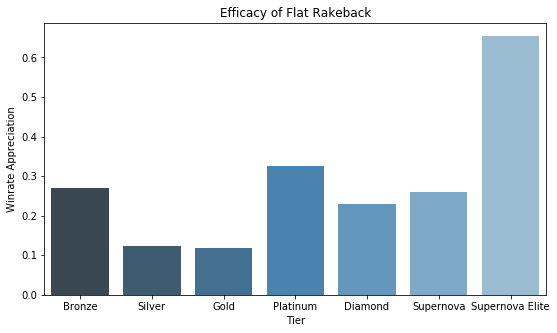

In [103]:
flat_rb = pd.DataFrame({'Tier': tiers, 'Winrate Appreciation': flat_rb_effect})
f,ax=plt.subplots(figsize=(9,5))
sns.barplot('Tier', 'Winrate Appreciation', data=flat_rb, palette="Blues_d")
ax.set_title('Efficacy of Flat Rakeback')
plt.show()